## RBM Datasets

- Caltech silloette

- omniglot
- binarized mnist
- norb
- svnh 
- frey faces
- cifar10
- lfw


#### need  to integrate

- alignMnist
- Yale face

- Olivetti Faces (sklearn)
- Weizmann Horses
- Caltech faces
- sketchy

-

<font color='red'>TODO:  systematically get each data set working, and running in RBM (binarized)</font>

#### rbm_datasets.py

Taken mostly from the "parmesan" package:

https://github.com/casperkaae/parmesan/blob/master/parmesan/datasets.py

for variational autoencoders



see also

http://deeplearning.net/datasets/



In [1]:
## %load rbm_datasets.py 
## %writefile rbm_datasets.py

import numpy as np
import pickle as pkl
import cPickle as cPkl
import gzip, zipfile, tarfile
import os, shutil, re, string, urllib, fnmatch
from matplotlib import pyplot
import matplotlib as mpl
from scipy.io import loadmat
%matplotlib inline  

def show_image(image): 
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()
    

def _get_datafolder_path():
    full_path = os.path.abspath('.')
    path = full_path +'/data'
    return path

def _unpickle(f):
    import cPickle
    fo = open(f, 'rb')
    d = cPickle.load(fo)
    fo.close()
    return d

def _download_frey_faces(dataset):
    """
    Download the Frey Faces dataset if it is not present.
    :return: The train, test and validation set.
    """
    origin = (
        'http://www.cs.nyu.edu/~roweis/data/frey_rawface.mat'
    )
    print 'Downloading data from %s' % origin
    urllib.urlretrieve(origin, dataset+'.mat')
    matdata = loadmat(dataset)
    f = gzip.open(dataset +'.pkl.gz', 'w')
    pkl.dump([matdata['ff'].T],f)
    
    
def _download_caltech(dataset):
    """
    Download the Caltech Silhouettes dataset if it is not present.
    :return: The train, test and validation set.
    """
    origin = (
    'https://people.cs.umass.edu/~marlin/data/caltech101_silhouettes_28_split1.mat'
    )
    print 'Downloading data from %s' % origin
    print 'dataset.mat %s' % dataset

    urllib.urlretrieve(origin, dataset)
    matdata = loadmat(dataset)
    print "keys ",matdata.keys()

    train_x = matdata['train_data'].astype('float32')
    train_y = matdata['train_labels'].astype('int')
    valid_x = matdata['val_data'].astype('float32')
    valid_y = matdata['val_labels'].astype('int')
    test_x = matdata['test_data'].astype('float32')
    test_y = matdata['test_labels'].astype('int')
    print train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape


    with open(dataset +'.pkl', 'w') as f:
                pkl.dump([train_x, train_y, valid_x, valid_y, test_x, test_y], f,
                         protocol=cPkl.HIGHEST_PROTOCOL)

    

def _download_mnist_realval(dataset):
    """
    Download the MNIST dataset if it is not present.
    :return: The train, test and validation set.
    """
    origin = (
        'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print 'Downloading data from %s' % origin
    urllib.urlretrieve(origin, dataset)

def _download_omniglot_iwae(dataset):
    """
    Download the Omniglot dataset if it is not present.
    :return: The train, test and validation set.
    """
    origin = (
        'https://github.com/yburda/iwae/raw/'
        'master/datasets/OMNIGLOT/chardata.mat'
    )
    print 'Downloading data from %s' % origin
    urllib.urlretrieve(origin, dataset + '/chardata.mat')


def _download_norb_small(dataset):
    """
    Download the Norb dataset
    """
    print 'Downloading small resized norb data'

    urllib.urlretrieve('http://dl.dropbox.com/u/13294233/smallnorb/smallnorb-'
                       '5x46789x9x18x6x2x32x32-training-dat-matlab-bicubic.mat',
                       dataset + '/smallnorb_train_x.mat')
    urllib.urlretrieve('http://dl.dropbox.com/u/13294233/smallnorb/smallnorb-'
                       '5x46789x9x18x6x2x96x96-training-cat-matlab.mat',
                       dataset + '/smallnorb_train_t.mat')

    urllib.urlretrieve('http://dl.dropbox.com/u/13294233/smallnorb/smallnorb-'
                       '5x01235x9x18x6x2x32x32-testing-dat-matlab-bicubic.mat',
                       dataset + '/smallnorb_test_x.mat')
    urllib.urlretrieve('http://dl.dropbox.com/u/13294233/smallnorb/smallnorb-'
                       '5x01235x9x18x6x2x96x96-testing-cat-matlab.mat',
                       dataset + '/smallnorb_test_t.mat')

    data = loadmat(dataset + '/smallnorb_train_x.mat')['traindata']
    train_x = np.concatenate([data[:,0,:].T, data[:,0,:].T]).astype('float32')
    data = loadmat(dataset + '/smallnorb_train_t.mat')
    train_t = data['trainlabels'].flatten().astype('float32')
    train_t = np.concatenate([train_t, train_t])

    data = loadmat(dataset + '/smallnorb_test_x.mat')['testdata']
    test_x = np.concatenate([data[:,0,:].T, data[:,0,:].T]).astype('float32')
    data = loadmat(dataset + '/smallnorb_test_t.mat')
    test_t = data['testlabels'].flatten().astype('float32')
    test_t = np.concatenate([test_t, test_t])
    with open(dataset+'/norbsmall32x32.cpkl','w') as f:
        cPkl.dump([train_x, train_t, test_x, test_t], f,
                  protocol=cPkl.HIGHEST_PROTOCOL)


def _download_rotten_tomatoes(dataset):
    origin = ('http://www.cs.cornell.edu/people/pabo/'
              'movie-review-data/rt-polaritydata.tar.gz')

    print 'Downloading data from %s' % origin
    urllib.urlretrieve(origin, dataset + '/rt-polaritydata.tar.gz')


def load_norb_small(
        dataset=_get_datafolder_path()+'/norb_small/norbsmall32x32.cpkl',
        dequantify=True,
        normalize=True ):
    '''
    Loads the real valued MNIST dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.isfile(dataset):
        datasetfolder = os.path.dirname(dataset)
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_norb_small(datasetfolder)

    with open(dataset,'r') as f:
        train_x, train_t, test_x, test_t = cPkl.load(f)

    if dequantify:
        train_x += np.random.uniform(0,1,size=train_x.shape).astype('float32')
        test_x += np.random.uniform(0,1,size=test_x.shape).astype('float32')
    if normalize:
        normalizer = train_x.max().astype('float32')
        train_x = train_x / normalizer
        test_x = test_x / normalizer

    return train_x, train_t, test_x, test_t


def _download_omniglot(dataset):
    """
    Download the omniglot dataset if it is not present.
    :return: The train, test and validation set.
    """
    from scipy.misc import imread,imresize
    origin_eval = (
        "https://github.com/brendenlake/omniglot/"
        "raw/master/python/images_evaluation.zip"
    )
    origin_back = (
        "https://github.com/brendenlake/omniglot/"
        "raw/master/python/images_background.zip"
    )
    print 'Downloading data from %s' % origin_eval
    urllib.urlretrieve(origin_eval, dataset + '/images_evaluation.zip')
    print 'Downloading data from %s' % origin_back
    urllib.urlretrieve(origin_back, dataset + '/images_background.zip')

    with zipfile.ZipFile(dataset + '/images_evaluation.zip', "r") as z:
        z.extractall(dataset)
    with zipfile.ZipFile(dataset + '/images_background.zip', "r") as z:
        z.extractall(dataset)

    background =  dataset + '/images_background'
    evaluation =  dataset + '/images_evaluation'
    matches = []
    for root, dirnames, filenames in os.walk(background):
        for filename in fnmatch.filter(filenames, '*.png'):
            matches.append(os.path.join(root, filename))
    for root, dirnames, filenames in os.walk(evaluation):
        for filename in fnmatch.filter(filenames, '*.png'):
            matches.append(os.path.join(root, filename))

    train = []
    test = []

    def _load_image(fn):
        image = imread(fn, True)
        image = imresize(image, (32, 32), interp='bicubic')
        image = image.reshape((-1))
        image = np.abs(image-255.)/255.
        return image

    for p in matches:
        if any(x in p for x in ['16.png','17.png','18.png','19.png','20.png']):
            test.append(_load_image(p))
        else:
            train.append(_load_image(p))

    shutil.rmtree(background+'/')
    shutil.rmtree(evaluation+'/')

    test = np.asarray(test)
    train = np.asarray(train)
    with open(dataset+'/omniglot.cpkl','w') as f:
        cPkl.dump([train, test],f,protocol=cPkl.HIGHEST_PROTOCOL)


def _download_lwf(dataset,size):
    from sklearn.datasets import fetch_lfw_people
    '''
    :param dataset:
    :return:
    '''
    lfw_people = fetch_lfw_people(color=True,resize=size)
    f = gzip.open(dataset, 'w')
    cPkl.dump([lfw_people.images.astype('uint8'),lfw_people.target], f,
              protocol=cPkl.HIGHEST_PROTOCOL)
    f.close()


def _download_mnist_binarized(datapath):
    """
    Download the fized binzarized MNIST dataset if it is not present.
    :return: The train, test and validation set.
    """
    datafiles = {
        "train": "http://www.cs.toronto.edu/~larocheh/public/"
                 "datasets/binarized_mnist/binarized_mnist_train.amat",
        "valid": "http://www.cs.toronto.edu/~larocheh/public/datasets/"
                 "binarized_mnist/binarized_mnist_valid.amat",
        "test": "http://www.cs.toronto.edu/~larocheh/public/datasets/"
                "binarized_mnist/binarized_mnist_test.amat"
    }
    datasplits = {}
    for split in datafiles.keys():
        print "Downloading %s data..." %(split)
        local_file = datapath + '/binarized_mnist_%s.npy'%(split)
        datasplits[split] = np.loadtxt(urllib.urlretrieve(datafiles[split])[0])

    f = gzip.open(datapath +'/mnist.pkl.gz', 'w')
    pkl.dump([datasplits['train'],datasplits['valid'],datasplits['test']],f)



def load_omniglot(dataset=_get_datafolder_path()+'/omniglot'):
    '''
    Loads the real valued MNIST dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.exists(dataset):
        os.makedirs(dataset)
        _download_omniglot(dataset)

    with open(dataset+'/omniglot.cpkl', 'rb') as f:
        train, test = cPkl.load(f)

    train = train.astype('float32')
    test = test.astype('float32')

    return train, test


def load_omniglot_iwae(dataset=_get_datafolder_path()+'/omniglot_iwae'):
    '''
    Loads the real valued Omniglot dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.exists(dataset):
        os.makedirs(dataset)
        _download_omniglot_iwae(dataset)

    data = loadmat(dataset+'/chardata.mat')

    train_x = data['data'].astype('float32').T
    train_t = np.argmax(data['target'].astype('float32').T,axis=1)
    train_char = data['targetchar'].astype('float32')
    test_x = data['testdata'].astype('float32').T
    test_t = np.argmax(data['testtarget'].astype('float32').T,axis=1)
    test_char = data['testtargetchar'].astype('float32')


    return train_x, train_t, train_char, test_x, test_t, test_char


def load_caltech_silhouettes(
        dataset=_get_datafolder_path()+'/caltech/caltech101_silhouettes_28_split1.mat'):
    '''
    Loads the real valued CalTech Silhouettes dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.isfile(dataset):
        datasetfolder = os.path.dirname(dataset)
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_caltech(dataset)

    with open(dataset+'.pkl','r') as f:
        train_x, train_y, valid_x, valid_y, test_x, test_y = pkl.load(f)

    return train_x, train_y, valid_x, valid_y, test_x, test_y 


def load_mnist_realval(
        dataset=_get_datafolder_path()+'/mnist_real/mnist.pkl.gz'):
    '''
    Loads the real valued MNIST dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.isfile(dataset):
        datasetfolder = os.path.dirname(dataset)
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_mnist_realval(dataset)

    f = gzip.open(dataset, 'rb')
    train_set, valid_set, test_set = pkl.load(f)
    f.close()
    x_train, targets_train = train_set[0], train_set[1]
    x_valid, targets_valid = valid_set[0], valid_set[1]
    x_test, targets_test = test_set[0], test_set[1]
    return x_train, targets_train, x_valid, targets_valid, x_test, targets_test


def load_mnist_binarized(
        dataset=_get_datafolder_path()+'/mnist_binarized/mnist.pkl.gz'):
    '''
    Loads the fixed binarized MNIST dataset provided by Hugo Larochelle.
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.isfile(dataset):
        datasetfolder = os.path.dirname(dataset)
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_mnist_binarized(datasetfolder)

    f = gzip.open(dataset, 'rb')
    x_train, x_valid, x_test = pkl.load(f)
    f.close()
    return x_train, x_valid, x_test

def _download_rcv1():
    """
    Download the rcv1 dataset from scikitlearn.
    :return: The train, test and validation set.
    """
    from sklearn.datasets import fetch_rcv1
    print "downloading rcv1 train data...."
    newsgroups_train = fetch_rcv1(subset='train')
    print "downloading rcv1 test data...."
    newsgroups_test = fetch_rcv1(subset='test')
    train_set = (newsgroups_train.data, newsgroups_train.target)
    test_set = (newsgroups_test.data, newsgroups_test.target)

    return train_set,test_set


def _download_20newsgroup():
    """
    Download the 20 newsgroups dataset from scikitlearn.
    :return: The train, test and validation set.
    """
    from sklearn.datasets import fetch_20newsgroups
    print "downloading 20 newsgroup train data...."
    newsgroups_train = fetch_20newsgroups(
        subset='train', remove=('headers', 'footers', 'quotes'))
    print "downloading 20 newsgroup test data...."
    newsgroups_test = fetch_20newsgroups(
        subset='test', remove=('headers', 'footers', 'quotes'))
    train_set = (newsgroups_train.data, newsgroups_train.target)
    test_set = (newsgroups_test.data, newsgroups_test.target)

    return train_set,test_set

def _bow(train, test, max_features=1000):
    '''
    bag-of-words encoding helper function
    '''
    from sklearn.feature_extraction.text import CountVectorizer
    from nltk.stem import WordNetLemmatizer
    from nltk.stem.porter import PorterStemmer as EnglishStemmer
    from nltk.tokenize import wordpunct_tokenize as wordpunct_tokenize

    x_train, y_train = train
    x_test, y_test = test


    stemmer = EnglishStemmer()
    lemmatizer = WordNetLemmatizer()
    for i in range(len(x_train)):
        x_train[i] = " ".join([lemmatizer.lemmatize(stemmer.stem(token.lower()))
                               for token in wordpunct_tokenize(
            re.sub('[%s]' % re.escape(string.punctuation), '', x_train[i]))])

    vectorizer_train = CountVectorizer(strip_accents='ascii',
                                       stop_words='english',
                                       token_pattern=r"(?u)\b\w[a-z]\w+[a-z]\b",
                                       max_features=max_features,
                                       vocabulary=None, dtype='float32')
    x_train = vectorizer_train.fit_transform(x_train).toarray()


    vocab_train = vectorizer_train.get_feature_names()
    vectorizer_test = CountVectorizer(strip_accents='ascii',
                                      stop_words='english',
                                      token_pattern=r"(?u)\b\w[a-z]\w+[a-z]\b",
                                      max_features=max_features,
                                      vocabulary=vocab_train,
                                      dtype='float32')
    x_test = vectorizer_test.fit_transform(x_test).toarray()

    # remove documents with no words
    r = np.where(x_train.sum(axis=1) > 0.)[0]
    x_train = x_train[r, :]
    y_train = y_train[r]

    r = np.where(x_test.sum(axis=1) > 0.)[0]
    x_test = x_test[r, :]
    y_test = y_test[r]

    return (x_train, y_train),(x_test, y_test), vocab_train


def _download_cifar10(dataset):
    """
    Download the Cifar10 dataset if it is not present.
    """
    origin = (
        'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    )
    print 'Downloading data from %s' % origin
    urllib.urlretrieve(origin, dataset)


def load_cifar10(
        dataset=_get_datafolder_path()+'/cifar10/cifar-10-python.tar.gz',
        normalize=True,
        dequantify=True):
    '''
    Loads the cifar10 dataset
    :param dataset: path to dataset file
    :param normalize: normalize the x data to the range [0,1]
    :param dequantify: Add uniform noise to dequantify the data following
        Uria et. al 2013
        "RNADE: The real-valued neural autoregressive density-estimator"
    :return: train and test data
    '''
    datasetfolder = os.path.dirname(dataset)
    batch_folder = datasetfolder+ '/cifar-10-batches-py/'
    if not os.path.isfile(dataset):
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_cifar10(dataset)

    if not os.path.isfile(batch_folder + 'data_batch_5'):
        with tarfile.open(dataset) as tar:
            tar.extractall(os.path.dirname(dataset))

    train_x, train_y = [],[]
    for i in ['1','2','3','4','5']:
        with open(batch_folder + 'data_batch_'+ i,'r') as f:
            data = cPkl.load(f)
            train_x += [data['data']]
            train_y += [data['labels']]
    train_x = np.concatenate(train_x)
    train_y = np.concatenate(train_y)


    with open(batch_folder + 'test_batch','r') as f:
        data = cPkl.load(f)
        test_x = data['data']
        test_y = np.asarray(data['labels'])

    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    if dequantify:
        train_x += np.random.uniform(0,1,size=train_x.shape).astype('float32')
        test_x += np.random.uniform(0,1,size=test_x.shape).astype('float32')
    if normalize:
        normalizer = train_x.max().astype('float32')
        train_x = train_x / normalizer
        test_x = test_x / normalizer

    train_x = train_x.reshape((50000, 3, 32, 32)).transpose(0, 2, 3, 1)
    test_x = test_x.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)

    return train_x.astype('float32'), train_y, test_x.astype('float32'), test_y


def load_frey_faces(
        dataset=_get_datafolder_path()+'/frey_faces/frey_faces',
        normalize=True,
        dequantify=True):
    '''
    :param dataset:
    :param normalize:
    :param dequantify: Add uniform noise to dequantify the data following
        Uria et. al 2013
        "RNADE: The real-valued neural autoregressive density-estimator"
    :return:
    '''
    datasetfolder = os.path.dirname(dataset+'.pkl.gz')
    if not os.path.isfile(dataset + '.pkl.gz'):
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_frey_faces(dataset)

    if not os.path.isfile(datasetfolder + '/fixed_split.pkl'):
        urllib.urlretrieve('https://raw.githubusercontent.com/casperkaae/'
                           'extra_parmesan/master/data_splits/'
                           'frey_faces_fixed_split.pkl',
                           datasetfolder + '/fixed_split.pkl')

    f = gzip.open(dataset+'.pkl.gz', 'rb')
    data = pkl.load(f)[0].reshape(-1,28,20).astype('float32')
    f.close()
    if dequantify:
        data = data + np.random.uniform(0,1,size=data.shape).astype('float32')
    if normalize:
        normalizer = data.max().astype('float32')
        data = data / normalizer
    return data

def load_lfw(
        dataset=_get_datafolder_path()+'/lfw/lfw',
        normalize=True,
        dequantify=True,
        size=0.25):
    '''
    :param dataset:
    :param normalize:
    :param dequantify: Add uniform noise to dequantify the data following
        Uria et. al 2013
        "RNADE: The real-valued neural autoregressive density-estimator"
    :param size: rescaling factor
    :return:
    '''

    dataset="%s_%0.2f.cpkl"%(dataset,size)
    datasetfolder = os.path.dirname(dataset)
    if not os.path.isfile(dataset):
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_lwf(dataset,size)

    if not os.path.isfile(datasetfolder + '/fixed_split.pkl'):
        urllib.urlretrieve('https://raw.githubusercontent.com/casperkaae/'
                           'extra_parmesan/master/data_splits/'
                           'lfw_fixed_split.pkl',
                           datasetfolder + '/fixed_split.pkl')


    f = gzip.open(dataset, 'rb')
    data = cPkl.load(f)[0].astype('float32')
    f.close()
    if dequantify:
        data = data + np.random.uniform(0,1,size=data.shape).astype('float32')
    if normalize:
        normalizer = data.max().astype('float32')
        data = data / normalizer
    return data


def load_svhn(
        dataset=_get_datafolder_path()+'/svhn/',
        normalize=True,
        dequantify=True,
        extra=False):
    '''
    :param dataset:
    :param normalize:
    :param dequantify: Add uniform noise to dequantify the data following
        Uria et. al 2013
        "RNADE: The real-valued neural autoregressive density-estimator"
    :param extra: include extra svhn samples
    :return:
    '''

    if not os.path.isfile(dataset +'svhn_train.cpkl'):
        datasetfolder = os.path.dirname(dataset +'svhn_train.cpkl')
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_svhn(dataset, extra=False)

    with open(dataset +'svhn_train.cpkl', 'rb') as f:
        train_x,train_y = cPkl.load(f)
    with open(dataset +'svhn_test.cpkl', 'rb') as f:
        test_x,test_y = cPkl.load(f)

    if extra:
        if not os.path.isfile(dataset +'svhn_extra.cpkl'):
            datasetfolder = os.path.dirname(dataset +'svhn_train.cpkl')
            if not os.path.exists(datasetfolder):
                os.makedirs(datasetfolder)
            _download_svhn(dataset, extra=True)

        with open(dataset +'svhn_extra.cpkl', 'rb') as f:
            extra_x,extra_y = cPkl.load(f)
        train_x = np.concatenate([train_x,extra_x])
        train_y = np.concatenate([train_y,extra_y])

    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    train_y = train_y.astype('int32')
    test_y = test_y.astype('int32')

    if dequantify:
        train_x += np.random.uniform(0,1,size=train_x.shape).astype('float32')
        test_x += np.random.uniform(0,1,size=test_x.shape).astype('float32')

    if normalize:
        normalizer = train_x.max().astype('float32')
        train_x = train_x / normalizer
        test_x = test_x / normalizer

    return train_x, train_y, test_x, test_y



def _download_svhn(dataset, extra):
    """
    Download the SVHN dataset
    """
    print 'Downloading data from http://ufldl.stanford.edu/housenumbers/, ' \
          'this may take a while...'
    if extra:
        print "Downloading extra data..."
        urllib.urlretrieve('http://ufldl.stanford.edu/housenumbers/extra_32x32.mat',
                           dataset+'extra_32x32.mat')
        extra = loadmat(dataset+'extra_32x32.mat')
        extra_x = extra['X'].swapaxes(2,3).swapaxes(1,2).swapaxes(0,1)
        extra_y = extra['y'].reshape((-1)) - 1

        print "Saving extra data"
        with open(dataset +'svhn_extra.cpkl', 'w') as f:
            pkl.dump([extra_x,extra_y],f,protocol=cPkl.HIGHEST_PROTOCOL)
        os.remove(dataset+'extra_32x32.mat')

    else:
        print "Downloading train data..."
        urllib.urlretrieve('http://ufldl.stanford.edu/housenumbers/train_32x32.mat',
                           dataset+'train_32x32.mat')
        print "Downloading test data..."
        urllib.urlretrieve('http://ufldl.stanford.edu/housenumbers/test_32x32.mat',
                           dataset+'test_32x32.mat')

        train = loadmat(dataset+'train_32x32.mat')
        train_x = train['X'].swapaxes(2,3).swapaxes(1,2).swapaxes(0,1)
        train_y = train['y'].reshape((-1)) - 1
        test = loadmat(dataset+'test_32x32.mat')
        test_x = test['X'].swapaxes(2,3).swapaxes(1,2).swapaxes(0,1)
        test_y = test['y'].reshape((-1)) - 1

        print "Saving train data"
        with open(dataset +'svhn_train.cpkl', 'w') as f:
            cPkl.dump([train_x,train_y],f,protocol=cPkl.HIGHEST_PROTOCOL)
        print "Saving test data"
        with open(dataset +'svhn_test.cpkl', 'w') as f:
            pkl.dump([test_x,test_y],f,protocol=cPkl.HIGHEST_PROTOCOL)
        os.remove(dataset+'train_32x32.mat')
        os.remove(dataset+'test_32x32.mat')







    # helper function for converting chars to matrix format
    def create_matrix(reviews, y_cls):
        num_seqs = len(reviews)
        X = np.zeros((num_seqs, max_len), dtype='int32') -1  # set all to -1
        for row in range(num_seqs):
            review = reviews[row]
            for col in range(len(review)):
                # try to look up key otherwise use unk_idx
                if review[col] in char2idx:
                    char_idx = char2idx[review[col]]
                else:
                    char_idx = unk_idx
                X[row, col] = char_idx

        mask = (X != -1).astype('float32')
        X[X==-1] = 0
        y = np.ones(num_seqs, dtype='int32')*y_cls
        return X, y, mask

    X_pos, y_pos, mask_pos = create_matrix(pos_lst, 1)
    X_neg, y_neg, mask_neg = create_matrix(neg_lst, 0)
    X = np.concatenate([X_pos, X_neg], axis=0)
    y = np.concatenate([y_pos, y_neg], axis=0)
    mask = np.concatenate([mask_pos, mask_neg])

    print "-"*40
    print "Minium length filter :", minimum_len
    print "Maximum length filter:", maximum_len
    if minimum_len is not None:
        seq_lens = mask.sum(axis=1)
        keep = seq_lens >= minimum_len
        print "Seqs below minimum   : %i" % np.invert(keep).sum()
        X = X[keep, :]
        y = y[keep]
        mask = mask[keep, :]

    if maximum_len is not None:
        seq_lens = mask.sum(axis=1)
        keep = seq_lens <= maximum_len
        print "Seqs above maximum   : %i" % np.invert(keep).sum()
        X = X[keep, :]
        y = y[keep]
        mask = mask[keep, :]

    np.random.seed(seed)
    p = np.random.permutation(X.shape[0])
    X = X[p]
    y = y[p]
    mask = mask[p]

    seq_lens = mask.sum(axis=1).astype('int32')
    print "X                    :", X.shape, X.dtype
    print "y                    :", y.shape, y.dtype
    print "mask                 :", mask.shape, mask.dtype
    print "MIN length           : ", seq_lens.min()
    print "MAX length           : ", seq_lens.max()
    print "MEAN length          : ", seq_lens.mean()
    print "UNKOWN chars         : ", np.sum(X==unk_idx)
    print "-"*40

    # check that idx's in X is the number of vocab_size + unk_idx
    n = vocab_size if isinstance(vocab_size, int) else len(vocab_size)
    assert len(np.unique(X)) == n  + 1
    assert sum(np.unique(y)) == 1 # check that y is 0,1
    return X, y, mask, vocab


def _one_hot(x,n_labels=None):
    if n_labels is None:
        n_labels = np.max(x)
    return np.eye(n_labels)[x]

def _download_and_extract_stl10(dest_directory):
    """
    SOURCE: https://github.com/mttk/STL10
    Download and extract the STL-10 dataset
    :return: None
    """
    import sys
    origin = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = origin.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(origin, filepath, reporthook=_progress)
        print('Downloaded', filename)

    binary_directory = os.path.join(dest_directory, 'stl10_binary')
    if not os.path.exists(binary_directory):
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)
    return binary_directory


def load_stl10(
        dataset=_get_datafolder_path()+'/stl10/stl10_binary.tar.gz',
        normalize=False,
        dequantify=False):
    '''
    Loads the stl10 dataset
    :param dataset: path to dataset file
    :param normalize: Not supported. For normalization we would need to
                      convert the dataset to float32 which would increase
                      the dataset size further
    :param dequantify: not supported
    :return: data. Note that the data will be returned as uint8 to save memory.
            You'll need to convert it to float32.



    '''
    if normalize is True:
        raise ValueError('Normalization with STL10 loader is not supported. '
                         'Create an iterator that normalizes on the fly')
    if dequantify is True:
        raise ValueError('Dequantify is not supported with STL10 loader. '
                         'Create an iterator that dequantifies on the fly')

    def read_all_images(path_to_data):
        print "Loading %s" % path_to_data,
        with open(path_to_data, 'rb') as f:
            # read whole file in uint8 chunks
            everything = np.fromfile(f, dtype=np.uint8)
            images = np.reshape(everything, (-1, 3, 96, 96))
            images = np.transpose(images, (0, 1, 3, 2))
            print "shp", images.shape, "dtype", images.dtype
            return images

    def read_labels(path_to_labels):
        print "Loading %s" % path_to_labels,
        with open(path_to_labels, 'rb') as f:
            labels = np.fromfile(f, dtype=np.uint8)
            labels -= 1 # from 1...10 to 0...9
            print "shp", labels.shape, "dtype", labels.dtype
        return labels

    datasetfolder = os.path.dirname(dataset)
    # download and extract if nessesary
    binary_directory = _download_and_extract_stl10(datasetfolder)

    data_path_train = os.path.join(binary_directory, 'train_X.bin')
    data_path_test = os.path.join(binary_directory, 'test_X.bin')
    data_path_unlab = os.path.join(binary_directory, 'unlabeled_X.bin')
    label_path_train = os.path.join(binary_directory, 'train_y.bin')
    label_path_test = os.path.join(binary_directory, 'test_y.bin')

    x_train = read_all_images(data_path_train)
    x_test = read_all_images(data_path_test)
    x_unlab = read_all_images(data_path_unlab)
    y_train = read_labels(label_path_train)
    y_test = read_labels(label_path_test)
    return x_train, y_train, x_test, y_test, x_unlab


/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## RBM

In [2]:
import sklearn
from sklearn.neural_network import BernoulliRBM
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline

In [3]:
def train_rbm(train_x, train_y, test_x, test_y):
    lr = linear_model.LogisticRegression()
    rbm = BernoulliRBM(random_state=0,n_iter=20, verbose=True)
    clf = Pipeline(steps=[('rbm', rbm), ('lr', lr)])

    clf.fit(train_x, train_y)

    print("Logistic regression using RBM features:\n%s\n" % (
        metrics.classification_report(
            test_y,
            clf.predict(test_x))))

## CalTech101 Silhouettes

https://people.cs.umass.edu/~marlin/data.shtml

Train/Validation/Test split for 28x28 Silhouettes:  
https://people.cs.umass.edu/~marlin/data/caltech101_silhouettes_28_split1.mat  
  
  -
  
<font color='red'>TODO: reshape labels and check</font>

In [4]:
train_x, train_y, valid_x, valid_y, test_x, test_y  = load_caltech_silhouettes()
print train_x.shape, train_y.shape

(4100, 784) (4100, 1)


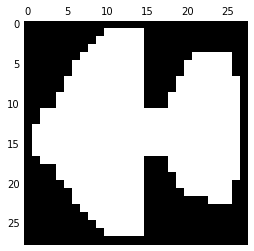

In [6]:
image = train_x[0,:]
image = np.reshape(image,[28,28])
show_image(image)

In [7]:
print train_y.shape
print np.unique(train_y).shape

(4100, 1)
(101,)


In [8]:
train_rbm(train_x, train_y, test_x, test_y)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -635.82, time = 1.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -311.88, time = 1.64s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -318.13, time = 1.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -284.22, time = 1.62s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -246.01, time = 1.59s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -261.73, time = 1.59s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -234.61, time = 1.63s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -254.76, time = 1.61s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -245.49, time = 1.62s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -227.89, time = 1.63s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -247.63, time = 1.59s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -231.57, time = 1.63s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -230.18, time = 1.63s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -226.12, time = 1.60s
[BernoulliRBM] 

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression using RBM features:
             precision    recall  f1-score   support

          1       0.91      0.84      0.87       349
          2       0.47      0.19      0.27       168
          3       0.50      0.82      0.62       168
          4       0.24      0.16      0.19        50
          5       0.99      0.95      0.97       349
          6       0.09      0.09      0.09        11
          7       0.60      0.75      0.67         8
          8       0.33      0.12      0.18         8
          9       0.25      0.44      0.32         9
         10       1.00      0.09      0.17        11
         11       0.00      0.00      0.00         9
         12       0.20      0.14      0.17         7
         13       0.26      0.19      0.22        26
         14       0.28      0.70      0.40        20
         15       0.00      0.00      0.00         9
         16       0.70      0.82      0.76        17
         17       0.19      0.33      0.24        18
     

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### How can we quantify the RBM / VAE results ?
 
- NLL 

- AIS



## MNIST

10 classes of digits,  784 (28 × 28 images), real valued in [0, 1] <br>
60,000 training and 10,000 test images 

Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner, “Gradient-based learning applied to document
recognition,” Proceedings of the IEEE, vol. 86, no. 11, pp. 2278–2324, 1998.


## Omniglot  28x28

https://github.com/brendenlake/omniglot

1623 different handwritten characters from 50 different alphabets. <br>
Each of the 1623 characters was drawn online via Amazon's Mechanical Turk by 20 different people.

In [9]:
train_x, train_t, train_char, test_x, test_t, test_char = load_omniglot_iwae()
print train_x.shape, train_t.shape
print "there are ",np.unique(train_char).shape, " classes"

(24345, 784) (24345,)
there are  (55,)  classes


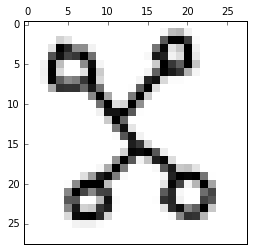

In [10]:
image = train_x[0,:]
image = np.reshape(image,[28,28])
show_image(image)

Output for julia code

In [26]:
import h5py

In [27]:
!rm omniglot.hdf5

In [28]:
with h5py.File("omniglot.h5", 'w') as hf:
    hf.create_dataset('train_x', data=train_x)
    hf.create_dataset('train_t', data=train_t)
    hf.create_dataset('test_x', data=test_x)
    hf.create_dataset('test_t', data=test_t)
    hf.create_dataset('train_char', data=train_char)
    hf.create_dataset('test_char', data=test_char)

In [29]:
np.linalg.norm(train_x, ord=2)

573.01581

## Frey Faces


http://www.cs.nyu.edu/~roweis/data.html

2000 images of Brendan's face, taken from sequential frames of a small video. Size: 20x28.

see also:

Denoising criterion for variational autoencoding framework <br>
http://arxiv.org/pdf/1511.06406.pdf


Stochastic Backpropagation and Approximate Inference in Deep Generative Models<br>
http://jmlr.org/proceedings/papers/v32/rezende14.pdf

(images are reversed)

In [72]:
faces = load_frey_faces()

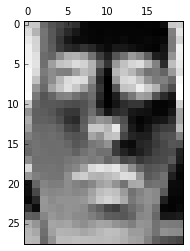

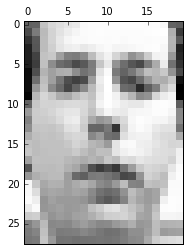

In [73]:
show_image(faces[10,:])
show_image(1.0-faces[10,:])

## Binarized MNIST

Binarized by (?), for direct comparison with other papers

but it appears there are no labels ?  

In [74]:
x_train, x_valid, x_test = load_mnist_binarized()
x_train.shape, x_valid.shape, x_test.shape

((50000, 784), (10000, 784), (10000, 784))

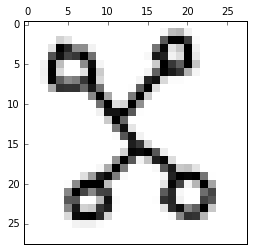

In [75]:
image = train_x[0,:]
image = np.reshape(image,[28,28])
show_image(image)

## Norb

http://www.cs.nyu.edu/~ylclab/data/norb-v1.0/


"This database is intended for experiments in 3D object reocgnition from shape. It contains images of 50 toys belonging to 5 generic categories: four-legged animals, human figures, airplanes, trucks, and cars. The objects were imaged by two cameras under 6 lighting conditions, 9 elevations (30 to 70 degrees every 5 degrees), and 18 azimuths (0 to 340 every 20 degrees)."

"The training set is composed of 5 instances of each category (instances 4, 6, 7, 8 and 9), and the test set of the remaining 5 instances (instances 0, 1, 2, 3, and 5)."

Y. LeCun, F.J. Huang, L. Bottou, Learning Methods for Generic Object Recognition with Invariance to Pose and Lighting. CVPR 2004.

Learning Methods for Generic Object Recognition with Invariance to Pose and Lighting <br>
http://leon.bottou.org/publications/pdf/cvpr-2004.pdf



also inverted, not very clear 

its not clear to me we can reasonably binarize this

In [76]:
train_x, train_t, test_x, test_t = load_norb_small()

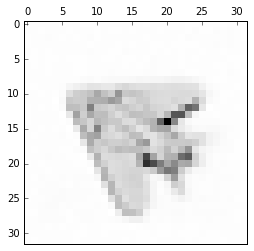

In [77]:
image = train_x[2,:]
image = np.reshape(image,[32,32])
show_image(1.0-image)

## Cifar10

CIFAR-10: 60,000 32 × 32 colour images, w/ 3072 attributes. 50,000 training and 10,000 test images 

A. Krizhevsky and G. Hinton, “Learning multiple layers of features from tiny images,” 2009.


In [78]:
train_x, train_y, test_x, test_y = load_cifar10()

In [79]:
image=train_x[0]
print image.shape

(32, 32, 3)


## LFW Faces in the Wild

not used yet

In [80]:
data = load_lfw()

In [81]:
len(data)

5212

## SVHN Street View House Numbers

not sure if we can binarize effectively

not used yet

In [82]:
train_x, train_y, test_x, test_y = load_svhn()

In [83]:
len(train_x)

73257

## Yale Face

(http://vision.ucsd.edu/content/yale-face-database)

Contains 165 gray scale images of 15 individuals. 

The pre-processed dataset is resized to 32 × 32 (1024 pixels) images.

D. Cai, X. He, Y. Hu, J. Han, and T. Huang, “Learning a spatially smooth subspace for face
recognition,” in 2007 IEEE Conference on Computer Vision and Pattern Recognition. IEEE,
2007, pp. 1–7

not implemented yet

## ST110 ?

not working

## AlignMNIST

not implemented yet, but I do have

## Weizmann Horses

http://www.msri.org/people/members/eranb/
 
"The Weizmann horse dataset (Borenstein & Ullman, 2008) consists of 328 binary images of size
200×240."



Sparse autoregressive networks  (2016)  
http://128.84.21.199/pdf/1511.04776v3.pdf
 

## Caltech Faces

Fergus, Robert, Perona, Pietro, and Zisserman, Andrew. Object class recognition by unsupervised
scale-invariant learning. In Conference on Computer Vision and Pattern Recognition, volume 2,
pp. 264–271, 2003


450 high-resolution color images; downsampled  to 200×150×3, which are 90,000 dimensions

## Sketchy

http://sketchy.eye.gatech.edu/

 75,471 sketches of 12,500 objects in  125 categories 

### BinaryConnect Preprocessing


BinaryConnect:  transforms cifar10 and svhn 
http://arxiv.org/pdf/1511.00363v3.pdf

"We preprocess the data using global contrast normalization nd ZCA whitening"

see: https://github.com/MatthieuCourbariaux/BinaryConnect

note:  MNIST should be 'permutation invariant' => no conv nets


## IWAE

### Binaries datasets 

<pre>
class BinarizedDatasetTheano():
 
     def minibatchIindex_minibatch_size(self, index, minibatch_size, srng, subdataset):
        data = self.data[subdataset][index*minibatch_size: (index+1)*minibatch_size]
        binary_data = T.cast(T.le(srng.uniform(data.shape), data), data.dtype)
        return binary_data
</pre>

Only Omniglot is really binarizes this way (I think) since we have MNIST already binarized

Also: binarization can be fixed or shuffled (?), and this seems to affect things
See the paper for details

 - def binarized_shuffled_omniglot(n_validation=1345):
 - binarized_mnist_fixed_binarization():
 
Can we binarize others ?


### Omniglot  (some key papers)

http://cims.nyu.edu/~brenden/LakeEtAl2011CogSci.pdf

http://web.mit.edu/cocosci/Papers/Science-2015-Lake-1332-8.pdf


http://jmlr.org/proceedings/papers/v48/santoro16.pdf

http://videolectures.net/site/normal_dl/tag=1005027/icml2015_grosse_fisher_matrix_01.pdf

https://www.fields.utoronto.ca/programs/scientific/14-15/bigdata/machine/slides/rg.pdf

### DL summer School (with key results)
http://shakirm.com/slides/DLSummerSchool_Aug2016_compress.pdf

### Claimed Results

(may have details on how to preprocess and augment these datasets)

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

## IRBM

https://github.com/MarcCote/iRBM

Evaluations:  AIS, NLL
"Average NLL on CalTech101 Silhouettes test set estimated using AIS with 100,000 intermediate distributions and 5000 chains"

NLL = negative log likeliehood

No post classification--should use L2-SVM ?







## TINY

The CIFAR10 dataset of natural images.

This dataset is a labeled subset of the 80 million tiny images dataset [TINY].

Lets use that too !

see :  http://fuel.readthedocs.io/en/latest/api/dataset.html#module-fuel.datasets.cifar10

&: https://github.com/cioc/PyTinyImage

can we scale up ?  what woudl this take ?

http://www.cs.ubc.ca/~lowe/525/papers/torralba08.pdf

#### thesis on RBMs applied to cifar

https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

see:  https://courses.cs.washington.edu/courses/cse590v/08au/retrieve.ppt

### Hinton's original example of text clustering ?

### atari games

Deep AutoRegressive Networks
http://arxiv.org/pdf/1310.8499v2.pdf
    

In [126]:
!ls data/align/alignmnist.npz

data/align/alignmnist.npz


In [128]:
import gzip
import numpy as np

data = np.load("data/align/alignmnist.npz", mmap_mode='r')


In [137]:
# memory map of very large file
# need to modify to use RBM at scale
# or we can scale as we see fit

# and use to classify other minst data
# (not sure if these are included or not, i forget...i think so)
x = data['x']
x = x[0:10,:,:]
y = data['y']
y = y.astype(int)
y = y[0:10]

print x.shape, y.shape

(10, 28, 28) (10,)


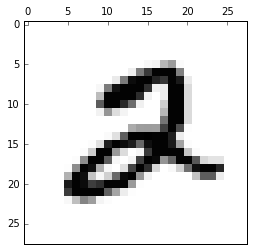

In [135]:
show_image(x[5])

## AIS  

http://www.cs.cmu.edu/~rsalakhu/papers/bm.pdf

https://github.com/MarcCote/iRBM/blob/master/iRBM/misc/annealed_importance_sampling.py